<a href="https://colab.research.google.com/github/Marianaoliveiranalysis/An-lise-Ecommerce-Smurfette-/blob/main/Meu_Projeto_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-gbq --quiet



In [ ]:
import pandas as pd

from pandas_gbq import read_gbq

In [ ]:
 from google.colab import auth
auth.authenticate_user()

In [ ]:
import sqlite3

In [ ]:
query = """
    SELECT *
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
    LIMIT 1000
"""
df = read_gbq(query, project_id='meu-projeto-ebac', dialect='standard')

Downloading: 100%|██████████|


In [ ]:
df.head()


,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,26599763,Pay-as-you-ride,21707,electric,2022-05-06 14:19:39+00:00,4051,10th/Red River,4051,10th/Red River,195
1,26742903,3-Day Weekender,17460,electric,2022-05-23 16:24:46+00:00,4051,10th/Red River,4051,10th/Red River,2
2,26599923,Pay-as-you-ride,19453,electric,2022-05-06 14:37:41+00:00,4051,10th/Red River,4051,10th/Red River,178
3,26701683,Local31,21772,electric,2022-05-17 22:50:29+00:00,4051,10th/Red River,4051,10th/Red River,4
4,26788653,Pay-as-you-ride,21740,electric,2022-05-29 19:41:40+00:00,4051,10th/Red River,4051,10th/Red River,31


In [ ]:
df.isnull().sum()


,0
trip_id,0
subscriber_type,0
bike_id,0
bike_type,0
start_time,0
start_station_id,0
start_station_name,0
end_station_id,47
end_station_name,0
duration_minutes,0


In [ ]:
df.describe()




,start_station_id,duration_minutes
count,1000.0,1000.0
mean,3364.443,34.124
std,957.716798,87.597991
min,2494.0,2.0
25%,2552.0,7.0
50%,3390.0,15.0
75%,4051.0,32.0
max,7190.0,1048.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   trip_id             1000 non-null   object             
 1   subscriber_type     1000 non-null   object             
 2   bike_id             1000 non-null   object             
 3   bike_type           1000 non-null   object             
 4   start_time          1000 non-null   datetime64[us, UTC]
 5   start_station_id    1000 non-null   Int64              
 6   start_station_name  1000 non-null   object             
 7   end_station_id      953 non-null    object             
 8   end_station_name    1000 non-null   object             
 9   duration_minutes    1000 non-null   Int64              
dtypes: Int64(2), datetime64[us, UTC](1), object(7)
memory usage: 80.2+ KB


In [ ]:
df['subscriber_type'].value_counts()

,count
subscriber_type,
Local31,259
Local365,158
3-Day Weekender,152
Pay-as-you-ride,130
Explorer,122
Student Membership,80
Single Trip (Pay-as-you-ride),55
24 Hour Walk Up Pass,36
U.T. Student Membership,4


In [ ]:
 #Quais estações de origem mais populares?

from pandas_gbq import read_gbq
 query = """
SELECT  start_station_name, COUNT(trip_id) AS total_
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
WHERE start_station_name IS NOT NULL
GROUP BY start_station_name
ORDER BY COUNT(trip_id) DESC
LIMIT 3
"""
df = read_gbq(query, project_id='meu-projeto-ebac', dialect='standard')

print(df)           # imprime tudo
df.head()           # mostra as 5 primeiras linhas (mais organizado no Colab)


Downloading: 100%|██████████|
     start_station_name  total_
0   21st/Speedway @ PCL  108559
1  21st & Speedway @PCL   71145
2  Dean Keeton/Speedway   65066


,start_station_name,total_
0,21st/Speedway @ PCL,108559
1,21st & Speedway @PCL,71145
2,Dean Keeton/Speedway,65066


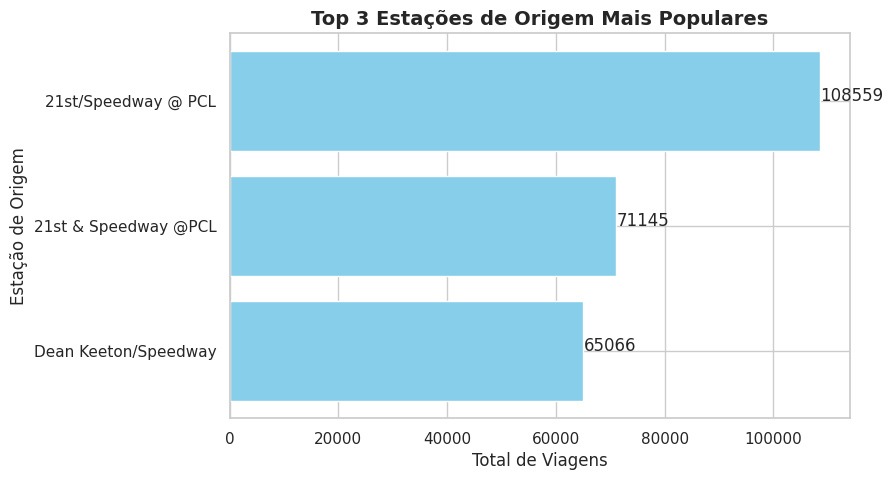

In [ ]:
import matplotlib.pyplot as plt

# Define tamanho do gráfico
plt.figure(figsize=(8,5))

# Cria gráfico de barras horizontais
plt.barh(df["start_station_name"], df["total_"], color="skyblue")

# Inverte a ordem para mostrar a mais popular no topo
plt.gca().invert_yaxis()

# Títulos e labels
plt.title("Top 3 Estações de Origem Mais Populares", fontsize=14, weight="bold")
plt.xlabel("Total de Viagens")
plt.ylabel("Estação de Origem")

# Mostra valores em cima das barras
for index, value in enumerate(df["total_"]):
    plt.text(value, index, str(value))

# Exibe o gráfico
plt.show()


In [ ]:
# Quais tipos de usuários mais utilizam as bicicletas?

from pandas_gbq import read_gbq
query = """
SELECT subscriber_type, COUNT(trip_id) AS total_
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
WHERE subscriber_type IS NOT NULL
GROUP BY subscriber_type
ORDER BY COUNT(trip_id) DESC
LIMIT 5

"""
df = read_gbq(query, project_id='meu-projeto-ebac', dialect='standard')
print(df)           # imprime tudo
df.head()           # mostra as 5 primeiras linhas

Downloading: 100%|██████████|
           subscriber_type  total_
0       Student Membership  430347
1                 Local365  389728
2  U.T. Student Membership  289108
3     24 Hour Walk Up Pass  272860
4                  Walk Up  260044


,subscriber_type,total_
0,Student Membership,430347
1,Local365,389728
2,U.T. Student Membership,289108
3,24 Hour Walk Up Pass,272860
4,Walk Up,260044


/tmp/ipython-input-1721813985.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="subscriber_type", y="total_", palette="Blues_d")


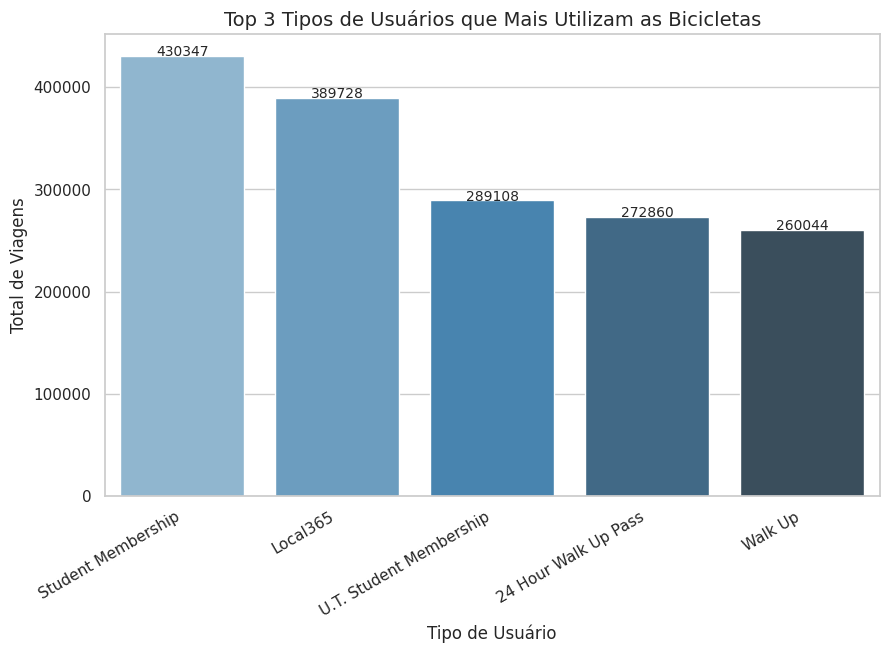

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="subscriber_type", y="total_", palette="Blues_d")

plt.title("Top 3 Tipos de Usuários que Mais Utilizam as Bicicletas", fontsize=14)
plt.xlabel("Tipo de Usuário")
plt.ylabel("Total de Viagens")

# Rotacionar rótulos do eixo X
plt.xticks(rotation=30, ha='right')

# Mostrar valores em cima das barras
for i, v in enumerate(df["total_"]):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()


In [ ]:
# Tempo médio de duração das viagens?

from pandas_gbq import read_gbq

query = """
SELECT
  AVG(duration_minutes) AS tempo_medio_minutos,
  COUNT(trip_id) AS total_viagens
FROM
  `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE duration_minutes IS NOT NULL
"""

df = read_gbq(query, project_id='meu-projeto-ebac', dialect='standard')
print(df)


Downloading: 100%|██████████|
   tempo_medio_minutos  total_viagens
0            28.719181        2271152


In [ ]:
# Qual o tipo de bicicleta é mais usada a clássica ou a eletrica nas viagens?
from pandas_gbq import read_gbq

query = """
SELECT
  bike_type,
  COUNT(trip_id) AS total_viagens
FROM
  `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE bike_type IS NOT NULL
GROUP BY bike_type
"""

df = read_gbq(query, project_id='meu-projeto-ebac', dialect='standard')
print(df)

Downloading: 100%|██████████|
  bike_type  total_viagens
0   classic        1347723
1  electric         923429
